In [1]:
# Load in the data
import pandas as pd

df=pd.read_csv('steam_games.csv',index_col=0)

In [2]:
# Create the corpus of descriptions
corpus=[]
df['Description'].map(lambda x: corpus.append(x))

0       None
1       None
2       None
3       None
4       None
        ... 
1910    None
1911    None
1912    None
1913    None
1914    None
Name: Description, Length: 1915, dtype: object

In [3]:
# Clean the corpus data
import re


clean_corpus=[]
for doc in corpus:
    text=doc
    text=re.sub(r'http\S+','',text)
    text=re.sub(r'[0-9]', '', text)
    text=re.sub(r'_', '', text)
    


    clean_corpus.append(text)

corpus=clean_corpus


In [4]:
from sklearn.feature_extraction import text
custom_stop_words=['game','new','world','play','players','content','time','experience','features','unique','like','player','mode','use','games','different','way','gameplay','edition','best','based','including','just','set','choose','real','join','ll','steam','available','reviews','want','series','special','work','using','pc','includes','open','original','complete','modes','need','key','turn','ultimate','style','high','enjoy','single','developers','classic','start','great','various','access','op','ve','playing','description','version','long','appropriate','end','graphics','years','come','deluxe','multiple','fully','don','options','development','additional','better','allows','types','path','elsword','th','noah','included','event','total','windows','update','dmark','gundam','iracing','seed','ending','orochi','britannia','ops','check','os','january','regarding','black','notice','thank','idle','note','updates']

In [5]:
#pd.set_option('display.max_rows', None)
# Use Count Vectorizer on Description Corpus
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(custom_stop_words))
X = cv.fit_transform(corpus)
cv_doc_term=X
cv_doc_term_df=pd.DataFrame(X.toarray(),index=df.Title,columns=cv.get_feature_names())


# Find common words
common_words_df=pd.DataFrame(X.toarray(),index=df.Title,columns=cv.get_feature_names())
common_words_df.loc["Total"] = common_words_df.sum()
common_words_df=pd.DataFrame(common_words_df.loc['Total'])
common_words_df.sort_values(by='Total',ascending=False).head(100)

/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Total
build,1131
battle,1112
make,1051
story,958
combat,956
...,...
base,281
universe,280
mechanics,280
order,277


In [6]:
# Use TF-IDF Vectorizer on Description Corpus
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(custom_stop_words))
X = tfidf.fit_transform(corpus).toarray()
tfidf_doc_term=X
tfidf_doc_term_df=pd.DataFrame(X, index=df.Title,columns=tfidf.get_feature_names())

/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Cosine Similarities
from sklearn.metrics.pairwise import cosine_similarity

# Find Cosine Similarity of CV matrix
cv_cos_sim=cosine_similarity(cv_doc_term)
cv_cos_sim_df=pd.DataFrame(cv_cos_sim,index=df.Title,columns=df.Title)


# Find Cosine Similarity of tfidf matrix
tfidf_cos_sim=cosine_similarity(tfidf_doc_term)
tfidf_cos_sim_df=pd.DataFrame(tfidf_cos_sim,index=df.Title,columns=df.Title)

# Sort the cosine similarity matrix to find similar games
sorted_cv_cos_sim_df=cv_cos_sim_df.sort_values(by=['Team Fortress 2'])

sorted_tfidf_cos_sim_df=tfidf_cos_sim_df.sort_values(by=['Team Fortress 2'])



In [8]:
# Topic Modeling
number_of_topics=10


# Latent Semantic Analysis (LSA)
from sklearn.decomposition import TruncatedSVD

# CV
cv_lsa = TruncatedSVD(n_components=number_of_topics,random_state=40)
cv_lsa.fit(cv_doc_term)
cv_topic_term_lsa=cv_lsa.components_
cv_topic_term_lsa_df=pd.DataFrame(cv_topic_term_lsa,columns=cv.get_feature_names())
cv_doc_topic_lsa=cv_lsa.transform(cv_doc_term)
cv_doc_topic_lsa_df=pd.DataFrame(cv_doc_topic_lsa,index=df.Title)

# tfidf
tfidf_lsa = TruncatedSVD(n_components=number_of_topics,random_state=40)
tfidf_lsa.fit(tfidf_doc_term)
tfidf_topic_term_lsa=tfidf_lsa.components_
tfidf_topic_term_lsa_df=pd.DataFrame(tfidf_topic_term_lsa,columns=tfidf.get_feature_names())
tfidf_doc_topic_lsa=tfidf_lsa.transform(tfidf_doc_term)
tfidf_doc_topic_lsa_df=pd.DataFrame(tfidf_doc_topic_lsa,index=df.Title)


/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [10]:
# CV LSA Top Topic Words
cv_topics=display_topics(cv_lsa,cv.get_feature_names(),5)



Topic  1
speedway, build, racing, battle, character

Topic  2
speedway, racing, cars, car, gt

Topic  3
character, events, rewards, power, master

Topic  4
warriors, dynasty, battle, sun, battles

Topic  5
war, units, campaign, army, forces

Topic  6
team, online, multiplayer, support, maps

Topic  7
build, space, simulator, war, create

Topic  8
weapons, forces, army, space, ship

Topic  9
viking, army, rpg, city, forces

Topic  10
team, viking, football, manager, season




/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# TFIDF LSA Top Topic Words
tfidf_topics=display_topics(tfidf_lsa,tfidf.get_feature_names(),5)


Topic  1
battle, build, war, combat, weapons

Topic  2
war, units, duty, campaign, multiplayer

Topic  3
car, cars, simulator, racing, build

Topic  4
space, build, resources, ship, war

Topic  5
heroes, strategy, battle, build, support

Topic  6
support, company, products, guidance, city

Topic  7
space, star, galaxy, ship, universe

Topic  8
space, support, ship, galaxy, software

Topic  9
football, manager, team, club, soccer

Topic  10
car, cars, heroes, city, racing




In [12]:
# Topic Modeling
# Non-Negative Matrix Factorization (NMF)
from sklearn.decomposition import NMF


# CV
cv_nmf = NMF(n_components=number_of_topics,random_state=40)
cv_nmf.fit(cv_doc_term)
cv_topic_term_nmf=cv_nmf.components_
cv_topic_term_nmf_df=pd.DataFrame(cv_topic_term_nmf,columns=cv.get_feature_names())
cv_doc_topic_nmf=cv_nmf.transform(cv_doc_term)
cv_doc_topic_nmf_df=pd.DataFrame(cv_doc_topic_nmf,index=df.Title)


# tfidf
tfidf_nmf = NMF(n_components=number_of_topics,random_state=40)
tfidf_nmf.fit(tfidf_doc_term)
tfidf_topic_term_nmf=tfidf_nmf.components_
tfidf_topic_term_nmf_df=pd.DataFrame(tfidf_topic_term_nmf,columns=tfidf.get_feature_names())
tfidf_doc_topic_nmf=tfidf_nmf.transform(tfidf_doc_term)
tfidf_doc_topic_nmf_df=pd.DataFrame(tfidf_doc_topic_nmf,index=df.Title)

/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarni

In [13]:
# CV NMF Top Topic Words
cv_topics_nmf=display_topics(cv_nmf,cv.get_feature_names(),5)


Topic  1
story, combat, characters, adventure, enemies

Topic  2
speedway, racing, cars, car, gt

Topic  3
character, events, rewards, power, characters

Topic  4
warriors, dynasty, battle, battles, sun

Topic  5
war, units, battle, campaign, battles

Topic  6
support, simulator, create, make, free

Topic  7
build, space, resources, ship, explore

Topic  8
forces, army, weapons, maps, vietnam

Topic  9
viking, faction, king, leader, army

Topic  10
team, online, multiplayer, teams, season




/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# tfidf NMF Top Topic Words
tfidf_topics_nmf=display_topics(tfidf_nmf,tfidf.get_feature_names(),5)


Topic  1
heroes, monsters, characters, character, adventure

Topic  2
war, units, strategy, command, campaign

Topic  3
car, cars, racing, race, simulator

Topic  4
build, resources, island, craft, building

Topic  5
mature, weapons, combat, violence, story

Topic  6
support, company, products, guidance, warriors

Topic  7
space, ship, galaxy, star, ships

Topic  8
city, batman, lego, marvel, arkham

Topic  9
football, manager, team, club, soccer

Topic  10
duty, multiplayer, warfare, modern, wwii




In [15]:
# Topic Modeling
# Latent Dirichlet Allocation (LDA)
from gensim import corpora, models, matutils

cv_term_doc=cv_doc_term.transpose()
lda_corpus = matutils.Sparse2Corpus(cv_term_doc)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
lda = models.LdaModel(corpus=lda_corpus, num_topics=number_of_topics, id2word=id2word)

In [16]:
lda.print_topics()

[(0,
  '0.004*"make" + 0.003*"combat" + 0.003*"free" + 0.003*"support" + 0.003*"enemies" + 0.003*"battle" + 0.003*"create" + 0.002*"powerful" + 0.002*"build" + 0.002*"online"'),
 (1,
  '0.004*"build" + 0.003*"team" + 0.003*"combat" + 0.003*"make" + 0.003*"battle" + 0.003*"weapons" + 0.003*"create" + 0.002*"items" + 0.002*"online" + 0.002*"control"'),
 (2,
  '0.004*"story" + 0.003*"team" + 0.003*"free" + 0.003*"explore" + 0.003*"combat" + 0.003*"action" + 0.003*"friends" + 0.002*"characters" + 0.002*"life" + 0.002*"multiplayer"'),
 (3,
  '0.003*"battle" + 0.003*"city" + 0.003*"online" + 0.003*"combat" + 0.003*"build" + 0.003*"multiplayer" + 0.002*"fight" + 0.002*"story" + 0.002*"action" + 0.002*"skills"'),
 (4,
  '0.003*"character" + 0.003*"build" + 0.003*"items" + 0.003*"story" + 0.003*"team" + 0.003*"enemies" + 0.003*"characters" + 0.003*"make" + 0.002*"powerful" + 0.002*"life"'),
 (5,
  '0.004*"battle" + 0.003*"explore" + 0.003*"character" + 0.003*"adventure" + 0.003*"online" + 0.003

In [17]:
#[doc for doc in lda[lda_corpus]]

In [18]:
# for item in cv_doc_term_df.columns:
#     print(item)

In [19]:
# tfidf NMF
tfidf_doc_topic_nmf_df

,0,1,2,3,4,5,6,7,8,9
Title,,,,,,,,,,
Counter-Strike: Global Offensive,0.000000,0.009180,0.004736,0.000000,0.048706,0.018281,0.000000,0.000000,0.016196,0.055059
Dota 2,0.074174,0.002148,0.012795,0.005477,0.000000,0.000000,0.000000,0.019387,0.000960,0.004991
PUBG: BATTLEGROUNDS,0.000000,0.005131,0.000000,0.000857,0.108682,0.005976,0.000000,0.000000,0.004713,0.000000
Apex Legends™,0.084572,0.023376,0.000000,0.000000,0.008766,0.000000,0.014598,0.033231,0.039191,0.000000
Lost Ark,0.084193,0.000867,0.000000,0.000000,0.098555,0.000000,0.012973,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
SpongeBob SquarePants: Battle for Bikini Bottom - Rehydrated,0.025259,0.009268,0.013983,0.002091,0.007297,0.003111,0.000385,0.004970,0.000000,0.019258
The Wild Eight,0.011805,0.000000,0.002494,0.070636,0.055423,0.000000,0.000000,0.000000,0.000000,0.000000
American Truck Simulator,0.000000,0.000000,0.186642,0.000000,0.000000,0.012388,0.000000,0.000000,0.000000,0.000000


In [20]:
# Recommender
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
rec_coords = pca.fit_transform(tfidf_doc_topic_nmf_df)
rec_coords_df=pd.DataFrame(rec_coords,index=tfidf_doc_topic_nmf_df.index)

from numpy.linalg import norm
from sklearn.metrics import pairwise_distances
distances = pairwise_distances(rec_coords[8].reshape(1, -1), rec_coords)

game_index_df=pd.DataFrame(rec_coords,index=tfidf_doc_topic_nmf_df.index)
game_index_df['index'] = range(0, len(rec_coords_df))
game_index_df.drop(columns=[0,1,2],inplace=True)



In [21]:
closest_games=distances.argsort()

In [22]:
tfidf_doc_topic_nmf_df.iloc[906].name

'Call of Duty®: WWII'

In [23]:
game_index_df.loc['Rust','index']

8

In [24]:
def recommend_games(game,x):
    recommended_games=[]
    index_num=game_index_df.loc[game,'index']
    distances = pairwise_distances(rec_coords[index_num].reshape(1, -1), rec_coords)
    closest_games=distances.argsort()
    for i in closest_games[0][:x]:
        recommended_games.append(rec_coords_df.iloc[i].name)

    return recommended_games


    

In [25]:
recommend_games("DayZ",10)

['DayZ',
 'Dead Maze',
 'Night of the Dead',
 'Kenshi',
 'Green Hell',
 'Project Zomboid',
 'The Isle',
 'Graveyard Keeper',
 'Stranded: Alien Dawn',
 'The Wild Eight']

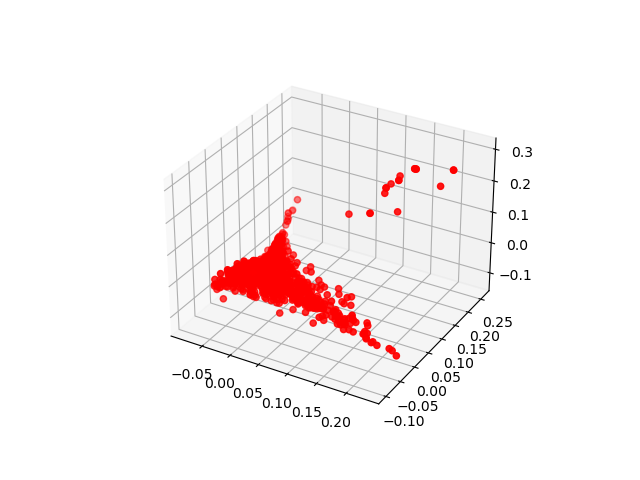

In [26]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x=rec_coords_df[0]
y=rec_coords_df[1]
z=rec_coords_df[2]

ax.scatter(x, y, z, c='r', marker='o')

In [33]:
recommend_games("PUBG: BATTLEGROUNDS",11)

['PUBG: BATTLEGROUNDS',
 'Requiem: Desiderium Mortis',
 'A Plague Tale: Innocence',
 'Dishonored®: Death of the Outsider™',
 'Katana ZERO',
 'The Bridge Curse Road to Salvation',
 'Detroit: Become Human',
 'Borderlands 3',
 'NARAKA: BLADEPOINT',
 'DEATHLOOP',
 'Bayonetta']